In [9]:
import pandas as pd

df1 = pd.read_csv('/Unemployment_Rate_upto_11_2020.csv')
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [10]:
df2 = pd.read_csv('/Unemployment in India.csv')
print(df2.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:

df1.info()
df2.info()
df1.isnull().sum()
df2.isnull().sum()
print("Columns in df1:")
print(df1.columns)
print("\nColumns in df2:")
print(df2.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [15]:

df1.describe()
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [16]:

df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

/Unemployment_Rate_upto_11_2020.csv

In [23]:

# Rename columns for easier access
df1.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
              'Estimated Employed', 'Estimated Labour Participation Rate (%)',
              'Region.1', 'longitude', 'latitude']

# Convert date column
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

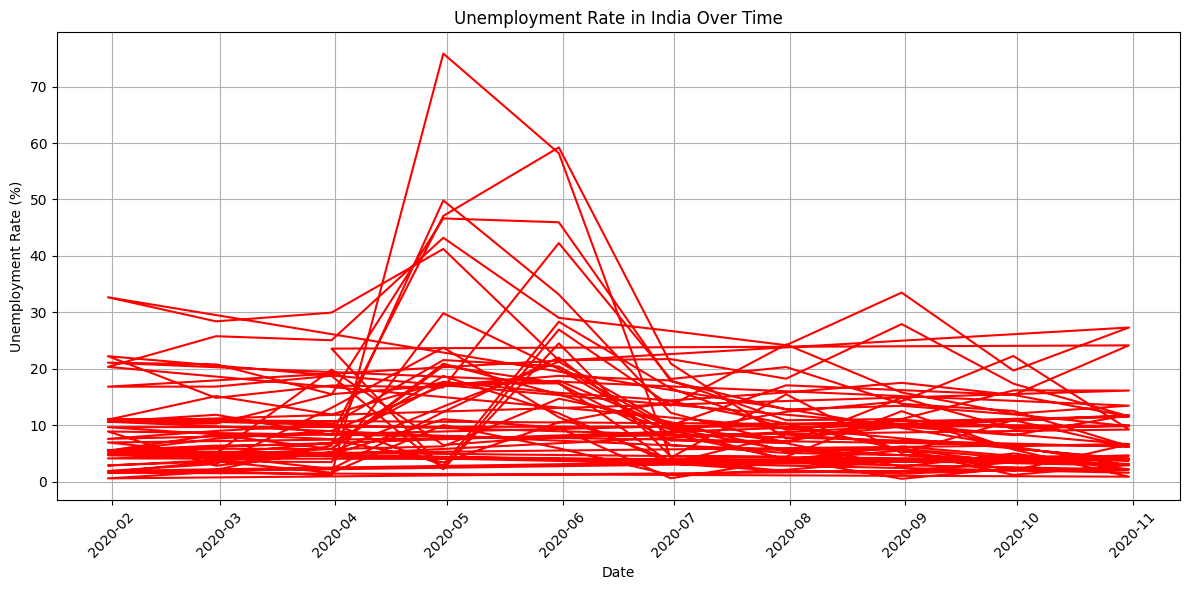

In [25]:

plt.figure(figsize=(12,6))
plt.plot(df1['Date'], df1['Estimated Unemployment Rate (%)'], color='red')
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

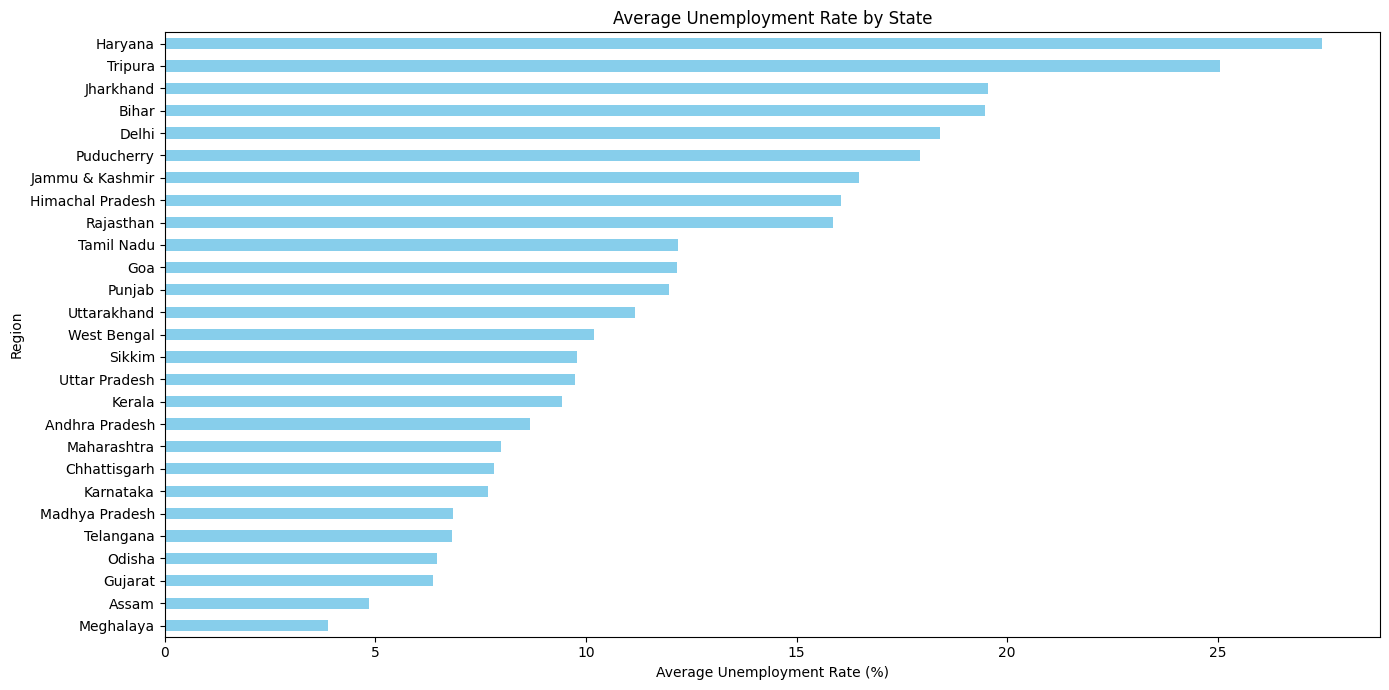

In [29]:

state_avg = df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(14,7))
state_avg.plot(kind='barh', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Average Unemployment Rate (%)')
plt.tight_layout()
plt.show()

In [30]:

# Strip whitespace from all column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [31]:
print(df2.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [32]:

df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

<ipython-input-33-592271045>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=covid_avg.index, y=covid_avg.values, palette='magma')


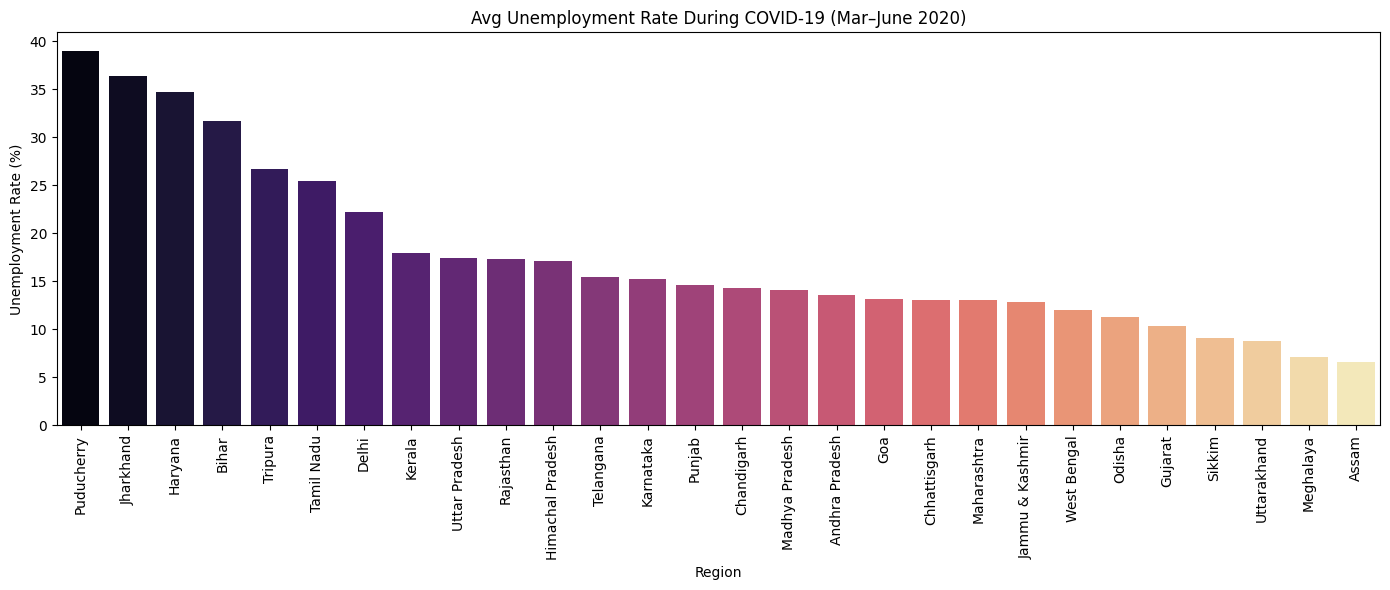

In [33]:

# Filter March to June 2020
covid_period = df2[(df2['Date'] >= '2020-03-01') & (df2['Date'] <= '2020-06-30')]

# Average unemployment rate during COVID
covid_avg = covid_period.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=covid_avg.index, y=covid_avg.values, palette='magma')
plt.title('Avg Unemployment Rate During COVID-19 (Mar–June 2020)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

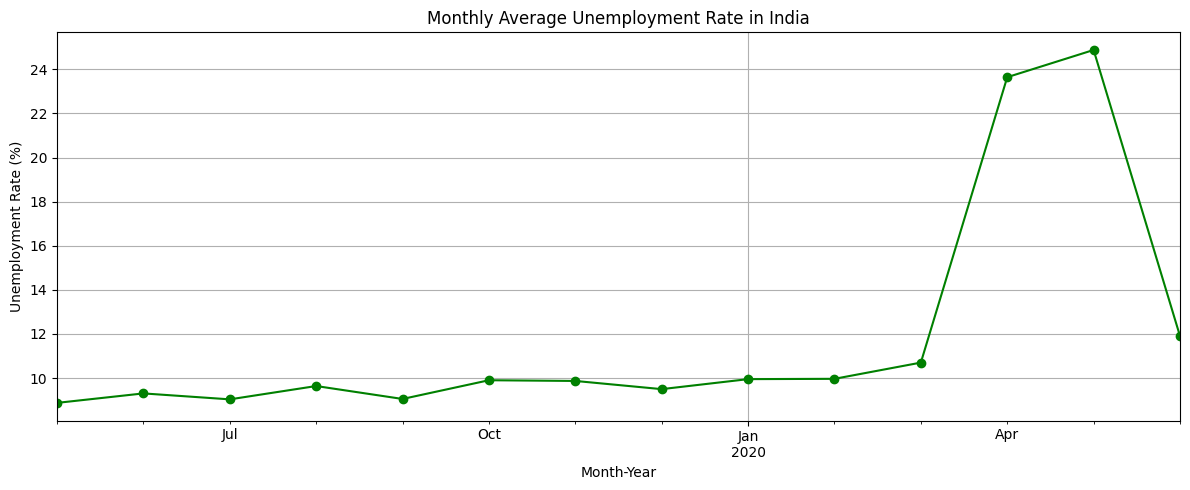

In [34]:

# Extract month-year
df2['Month_Year'] = df2['Date'].dt.to_period('M')

monthly_avg = df2.groupby('Month_Year')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,5))
monthly_avg.plot(marker='o', color='green')
plt.title('Monthly Average Unemployment Rate in India')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Month-Year')
plt.grid(True)
plt.tight_layout()
plt.show()

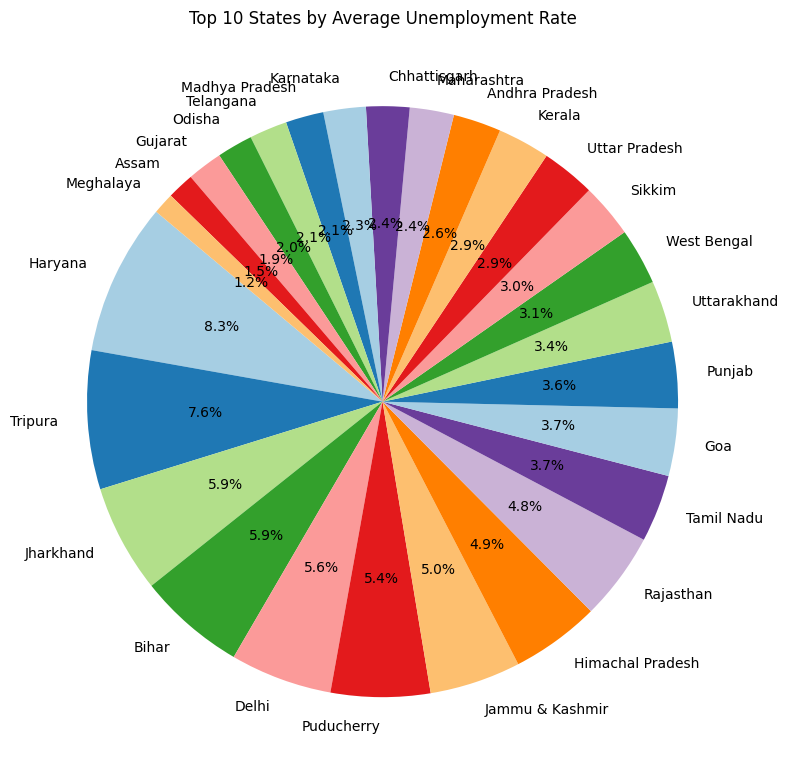

In [36]:

import matplotlib.pyplot as plt

# Group by Region and calculate mean unemployment rate
state_avg = df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Sort and pick top 10 states with highest average unemployment (optional)
top_states = state_avg.sort_values(ascending=False).head(28)

# Plot pie chart
plt.figure(figsize=(8,8))
colors = plt.cm.Paired(range(10))  # nice color map

plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Top 10 States by Average Unemployment Rate')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.tight_layout()
plt.show()